In [8]:
from __future__ import unicode_literals
from spacy.lang.en.stop_words import STOP_WORDS
import gensim
import spacy
import textacy
import re
import numpy as np
from scipy import spatial

nlp = spacy.load('en')

In [20]:
#loading word2vec
model = gensim.models.KeyedVectors.load_word2vec_format('./googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin',binary=True,limit=500000) 

#Training word2vec wmbedding using the phrase corpus or similar
# sentences = [sent1_phr_lst,sent2_phr_lst]
# model = Word2Vec(min_count=1)
# model.build_vocab(sentences)  # prepare the model vocabulary
# model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) 

In [131]:
# Given two sentences that are known to be paraphrases, pick the phrases that are similar and
# contribute to their overall similarity:
# Example 1:
# Charlie Chan is off the case for the Fox Movie Channel.
# The Fox Movie Channel has banned Charlie Chan.

# Feelings about current business conditions improved substantially from the first quarter, jumping from 40 to 55.
# Assessment of current business conditions improved substantially, the Conference Board said, jumping to 55 from 40 in the
# first quarter.

In [66]:
sent1 = "Feelings about current business conditions improved substantially from the first quarter, jumping from 40 to 55."
sent2 = "Assessment of current business conditions improved substantially, the Conference Board said, jumping to 55 from 40 in the first quarter."

In [67]:
# Cleaning the sentence
# def clean_sentence(sentence):
#     sentence = sentence.strip()
#     sentence = re.sub(r'[^a-zA-Z0-9\s]','', sentence)
#     return re.sub(r'\s{2,}', ' ', sentence)
                      
# For Removing the stopwords
# # Removing stopwords
# def Remove_stopwords(sentence):
#     return ' '.join([token for token in sentence.split() if token not in STOP_WORDS])

In [68]:
# Extracting the phrases from the sentences
def extract_phrases(doc):
    phrase_list = []
    # Extracting the noun phrase from the sentence
    for chunk in doc.noun_chunks:
         phrase_list.append(str(chunk).lower())
      
    #Extracting the verb phrase from the sentence
    pattern =  r'<VERB>?<ADV>*<VERB>+'
    lists = textacy.extract.pos_regex_matches(doc, pattern)
    for list in lists:
         phrase_list.append(list.text.lower())
    
    return phrase_list

In [69]:
# Averaging the vector for each word in a phrase
def avg_feature_vector(sentence, model, num_features, index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [70]:
# sent1 = clean_sentence(sent1)
# sent2 = clean_sentence(sent2)

In [71]:
sent1_phr_lst = extract_phrases(nlp(sent1))
sent2_phr_lst = extract_phrases(nlp(sent2))

/home/irfan/anaconda3/lib/python3.7/site-packages/textacy/extract.py:327: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",
/home/irfan/anaconda3/lib/python3.7/site-packages/textacy/extract.py:327: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",


In [72]:
print(sent1_phr_lst)
print(sent2_phr_lst)

['feelings', 'current business conditions', 'the first quarter', 'improved', 'jumping']
['assessment', 'current business conditions', 'the conference board', 'the first quarter', 'improved', 'said', 'jumping']


In [77]:
# Finding the phrases with the highest similarity
for ph1 in sent1_phr_lst:
    max_sim = 0
    ph_sim =''
    for ph2 in sent2_phr_lst:
        if max_sim == 0:
            # Cosine similarity between two words.
            max_sim = model.wv.n_similarity(ph1.lower().split(), ph2.lower().split())
            ph_sim = ph2
        elif max_sim <= model.wv.n_similarity(ph1.lower().split(), ph2.lower().split()):
            max_sim = model.wv.n_similarity(ph1.lower().split(), ph2.lower().split())
            ph_sim = ph2
            
    if max_sim >= 0:
        print(ph1,',',ph_sim,',',max_sim)

feelings , current business conditions , 0.18913332
current business conditions , current business conditions , 1.0
the first quarter , the first quarter , 1.0
improved , improved , 1.0
jumping , jumping , 1.0


/home/irfan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/irfan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
/home/irfan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [44]:
#loading word2vec
model = gensim.models.KeyedVectors.load_word2vec_format('./googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin',binary=True,limit=500000) 
model.similarity('is', 'banned')

0.018422892

In [45]:
sent1

'Charlie Chan is off the case for the Fox Movie Channel'

In [17]:
import numpy as np
from scipy import spatial

index2word_set = set(model.wv.index2word)

def avg_feature_vector(sentence, model, num_features, index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

/home/irfan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [19]:
s1_afv = avg_feature_vector('sentence', model=model, num_features=300, index2word_set=index2word_set)
s2_afv = avg_feature_vector('this is also sentence', model=model, num_features=300, index2word_set=index2word_set)
sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
print(sim)

0.764363706111908


In [40]:
s1 = 'Charlie Chan making sentence'
s2 = 'this is also sentence made by Charlie Chan' #corrected variable name

distance = model.wv.n_similarity(s1.lower().split(), s2.lower().split())

/home/irfan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [41]:
print(distance)

0.8618682


# Using fasttext

In [221]:
from gensim.models import FastText
from gensim.test.utils import common_texts
model = FastText(size=4, window=3, min_count=1)  # instantiate
model.build_vocab(sentences=common_texts)
model.train(sentences=common_texts, total_examples=len(common_texts), epochs=10)  # train

In [222]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [223]:
model.wv.similarity('human' ,  'user')

0.70550853

In [23]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

matcher.add("off", None, nlp("is off"))
doc = nlp("The Fox Movie Channel has banned Charlie Chan.")

matches = matcher(doc)
matches

[]

In [9]:
matcher = PhraseMatcher(nlp.vocab)
assert "OBAMA" not in matcher
matcher.add("OBAMA", None, nlp("Barack Obama"))
assert "OBAMA" in matcher

In [19]:
from __future__ import unicode_literals
import spacy,en_core_web_sm

nlp = spacy.load('en_core_web_sm')
sentence = "Barack Obama lifts America one last time in emotional farewell"
# pattern = r'<VERB>?<ADV>*<VERB>+'
pattern =  r'<PREP> <DET>? (<NOUN>+<ADP>)* <NOUN>+'
doc = nlp(sentence)
lists = textacy.extract.pos_regex_matches(doc, pattern)
for list in lists:
    print(list.text)

C:\ProgramData\Anaconda3\lib\site-packages\textacy\extract.py:327: DeprecationWarning: `pos_regex_matches()` has been deprecated! for similar but more powerful and performant functionality, use `textacy.extract.matches()` instead.
  action="once",


In [12]:
import nltk
from nltk.corpus import wordnet as wn

# find approriate sense of word
deer = wn.synset('deer.n.01')
elk =wn.synset('elk.n.01')

# find path similarity
deer.path_similarity(elk)

0.5

In [27]:
# Extracting phrases using gensim
from gensim.models.phrases import Phrases, Phraser
def build_phrases(sentences):
    phrases = Phrases(sentences,
                      min_count=2,
                      threshold=7)
    print(phrases)
    return Phraser(phrases)

phrase= build_phrases("Barack Obama lifts America one last time in emotional farewell")

Phrases<19 vocab, min_count=2, threshold=7, max_vocab_size=40000000>


In [49]:
from gensim.models import Phrases
# documents = ["the mayor of new york was there", "machine learning can be useful sometimes","new york mayor was present"]
documents = [sent1 , sent2]
sentence_stream = [doc.split(" ") for doc in documents]
bigram = Phrases(sentence_stream, min_count=1, threshold=2)
sent = ['The', 'Fox' ,'Movie', 'Channel', 'has', 'banned', 'Charlie', 'Chan']
print(bigram[sent])

['The', 'Fox_Movie', 'Channel', 'has', 'banned', 'Charlie', 'Chan']


In [68]:
from gensim.models import Word2Vec
sentences = [['i','reports','him'], ['he','reported']]
model = Word2Vec(min_count=1)
model.build_vocab(sentences)  # prepare the model vocabulary
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)  # train word vectors

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


(1, 25)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.05383833

In [62]:
sent1_noun_phr_lst

['Charlie Chan', 'the case', 'the Fox Movie Channel']

In [63]:
sent2_noun_phr_lst

['The Fox Movie Channel', 'Charlie Chan']

In [1]:
# Different types of tree travarsal
import nltk
s = '(ROOT (S (NP (NNP Europe)) (VP (VBZ is) (PP (IN in) (NP (DT the) (JJ same) (NNS trends)))) (. .)))'
tree = nltk.tree.Tree.fromstring(s)
def traverse_tree(tree):
    # print("tree:", tree)
    for subtree in tree:
        if type(subtree) == nltk.tree.Tree:
            traverse_tree(subtree)
traverse_tree(tree)

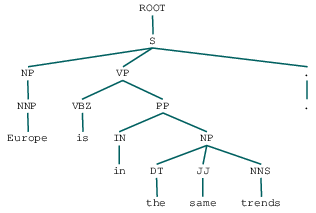

In [2]:
tree

In [ ]:
# W2V similarity value 

sent1 = "Charlie Chan is off the case for the Fox Movie Channel."
